In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('car.data')

In [34]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [35]:
headers = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = headers
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [36]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [38]:
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contain {temp} null values..')

In [39]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb

In [40]:
for col in df.select_dtypes(include=object):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

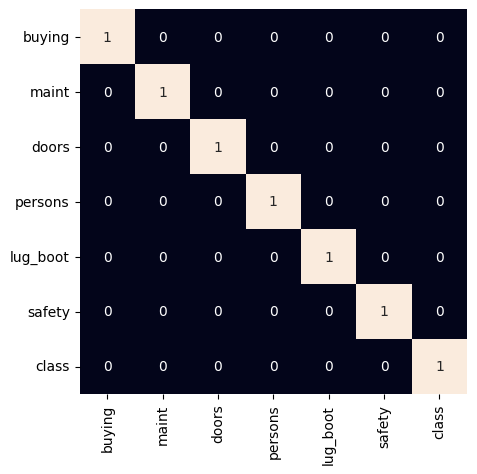

In [41]:
plt.figure(figsize=(5,5))
sb.heatmap(df.corr() > 0.5, annot=True,cbar=False)
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

In [77]:
features = df.iloc[:,:-1]
target = df['class']

In [101]:
X_train,X_test,y_train,y_test = train_test_split(features,target, test_size=0.3, random_state=40)
X_train.shape, y_train.shape ,X_test.shape

((1208, 6), (1208,), (519, 6))

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

prediction = model.predict(X_test)

In [107]:
accuracy = accuracy_score(y_test,prediction)
classi_rep = classification_report(y_test,prediction, target_names=le.classes_)
accuracy

0.9730250481695568

In [108]:
classi_rep

'              precision    recall  f1-score   support\n\n         acc       0.94      0.93      0.94       110\n        good       0.79      0.83      0.81        18\n       unacc       0.99      0.99      0.99       375\n       vgood       1.00      1.00      1.00        16\n\n    accuracy                           0.97       519\n   macro avg       0.93      0.94      0.93       519\nweighted avg       0.97      0.97      0.97       519\n'

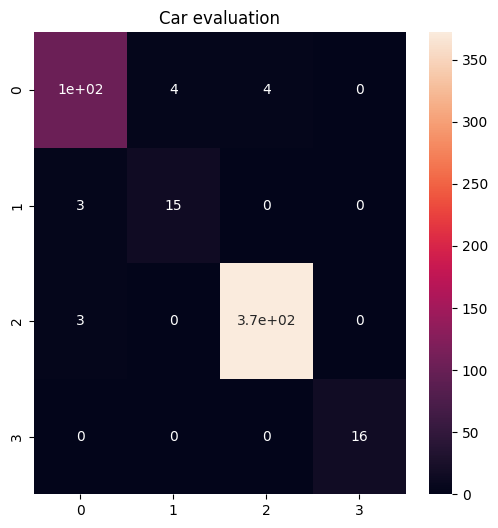

In [110]:
cf_matrix = confusion_matrix(y_test,prediction)
plt.figure(figsize=(6,6))
sb.heatmap(cf_matrix,annot=True)
plt.title("Car evaluation")
plt.show()